In [2]:

import fnmatch
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_datasets.public_api as tfds
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg



c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
img_dim = 32
dir_dataset = 'C:/Users/ryanb/cell_images'
categories = ['Parasitized','Uninfected']

X = []
y = []
for cat in categories:
    path = os.path.join(dir_dataset, cat)
    
    for image in os.listdir(path):
        if 'Thumbs' not in image:
        #try:
            img_data = imread(os.path.join(path, image))
            img_scaled = resize(img_data, (img_dim, img_dim, 3))
            X.append(np.array(img_scaled) / 255)
            y.append(cat)
        else: 
            continue
        
            


# Examples of labeled images

In [1]:
plt.imshow(X[0], interpolation='nearest')
plt.show()


NameError: name 'dir_dataset' is not defined

# Data Processing

Encode labels as binary (0,1), split and shuffle data, convert data to tf.tensors.

In [3]:

## 0 = PARASITIZED, 1 = UNINFECTED

le = preprocessing.LabelEncoder().fit(y)
y_encoded = np.array(le.transform(y))


X_train, X_test, y_train, y_test = train_test_split(np.array(X), y_encoded, test_size = 0.2, random_state = 42, shuffle = True)



#le = preprocessing.LabelEncoder().fit(y)
#y_train_encoded = le.transform(y_train)
#y_test_encoded = le.transform(y_test)

X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)

y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

In [4]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(x_test)

y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

In [19]:
from tensorflow import keras
from tensorflow.keras import models, layers


#Notes: Input - Conv - Pool - Norm - Dropout - Conv2 - Max2 - norm - dropout -- 2x(dense, norm, dropout) - sigmoid

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_dim,img_dim,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2), data_format = 'channels_last'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Conv2D(32,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Flatten(),

        layers.Dense(256, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation = 'relu'),
        layers.BatchNormalization(),

        layers.Dropout(0.2),
        layers.Dense(2,activation = 'sigmoid')

    ]
)

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

model_cnn.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 32)        

Epoch 1/10
689/689 [==============================] - 31s 43ms/step - loss: 0.5986 - accuracy: 0.7056 - val_loss: 1.1741 - val_accuracy: 0.5689
Epoch 2/10
689/689 [==============================] - 29s 43ms/step - loss: 0.2998 - accuracy: 0.8744 - val_loss: 0.4849 - val_accuracy: 0.8525
Epoch 3/10
689/689 [==============================] - 29s 43ms/step - loss: 0.2099 - accuracy: 0.9242 - val_loss: 0.1669 - val_accuracy: 0.9468
Epoch 4/10
689/689 [==============================] - 29s 43ms/step - loss: 0.1808 - accuracy: 0.9357 - val_loss: 0.1582 - val_accuracy: 0.9497
Epoch 5/10
689/689 [==============================] - 29s 42ms/step - loss: 0.1749 - accuracy: 0.9406 - val_loss: 0.1432 - val_accuracy: 0.9556
Epoch 6/10
689/689 [==============================] - 29s 43ms/step - loss: 0.1665 - accuracy: 0.9427 - val_loss: 0.1961 - val_accuracy: 0.9461
Epoch 7/10
689/689 [==============================] - 28s 41ms/step - loss: 0.1624 - accuracy: 0.9453 - val_loss: 0.2585 - val_accuracy:

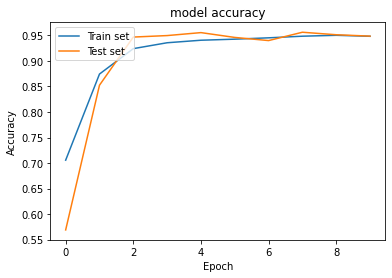

Maximum Test Set Accuracy =  0.9562771916389465


In [20]:
#history = model_cnn.fit(X_train_tensor, y_train_tensor, epochs=10, 
                    #validation_data=(X_test_tensor, y_test_tensor))
history = model_cnn.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Test set'], loc='upper left')
plt.show()

print('Maximum Test Set Accuracy = ', max(history.history['val_accuracy']))

In [10]:
#Examples of data.
#fig = tfds.show_examples(data, info, rows = 2, cols = 4)
#imshow

Object `imshow` not found.


# Data Loading and Formatting

## Reshape image resolution to 24 x 24, with RGB data.

In [140]:
directory = 'tensorflow_datasets/downloads/extracted/rat/cell_images'
cats = ['Parasitized', 'Uninfected']
img_size = 24
data = []

for cat in cats:
    path = os.path.join(directory, cat)
    label = cats.index(cat)
    for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img)
                                     )
                new_arr = cv2.resize(img_arr, (img_size, img_size))
        #plt.imshow(img_arr, cmap = 'gray')
                data.append([new_arr, label])
            except Exception as e:
                pass



## Shuffle the dataset

In [168]:
import random
random.shuffle(data)

## Create arrays X and y which hold the data and and corresponding label for each image  (0 = Parasitic, 1 = Uninfected) . The labels will be used later to assess model performance

In [169]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)
#X = X.reshape(-1,img_size * img_size

X = X.reshape(-1,img_size * img_size * 3)
X = X.T

## Here is an example of a resized image.

<function matplotlib.pyplot.show(close=None, block=None)>

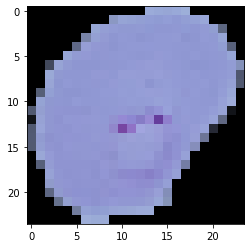

In [142]:

example = X[:,1].reshape(24,24,3)
plt.imshow(example)
plt.show

# PCA Implementation

## The sample mean of the resized images is shown below.

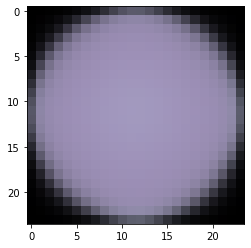

In [143]:

#Calculate Mean Cell Image
X.shape
mean_cell = np.mean(X, axis = 1)
mean_cell = mean_cell[:,None]
plt.imshow(mean_cell.reshape([img_size,img_size,3])/255)
mean_cell.shape

A = X - mean_cell

In [144]:
A.shape

(1728, 27558)

## Calculate zero-mean image

In [145]:
covmatrix = A @ A.T

In [146]:
eigvals, V = np.linalg.eig(covmatrix)

## Scree Plots of PCA

Text(0.5, 1.0, 'Scree Plot')

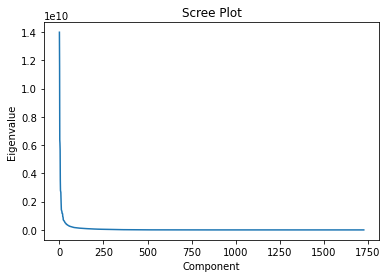

In [147]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort
# Tim Marks 2002
vsort, dsort = eigsort(V, eigvals)
plt.plot(range(len(dsort)), dsort.diagonal(),'-')
plt.ylabel('Eigenvalue')
plt.xlabel('Component')
plt.title('Scree Plot')

Text(0, 0.5, 'Proportion of Variance Explained')

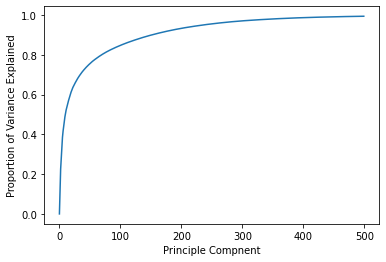

In [148]:
expl = []
for i in range(500):
    expl.append(np.sum(dsort[0:i])/ np.sum(dsort))
expl
plt.plot(range(500), expl, '-')
plt.xlabel('Principle Compnent')
plt.ylabel('Proportion of Variance Explained')

## 90.654% of the variance can be explained by 160 principal components

In [189]:
components = vsort.T @ A
components = components[:160,:]
components.shape

(160, 27558)

# K-means Implementation, K = 2

In [190]:
def calcSqDistances(X, Kmus):
    g,h = X.shape[0], Kmus.shape[0]
    sqDist = np.zeros((g,h),dtype =np.float32)
    
    for i in range(g):
        for o in range(h):
                sqDist[i,o] = np.linalg.norm(X[i] - Kmus[o])
    return sqDist
def determineRnk(sqDmat):
    Rnk = np.zeros((sqDmat.shape))
    for i in range(len(sqDmat)):
        c = np.argmin(sqDmat[i])
        Rnk[i,c] = 1
    return Rnk
def recalcMus(X, Rnk):
    k = Rnk.shape[1]
    d = X.shape[1]
    Kmus_new = np.zeros((k,d))
    
    return np.divide(X.T @ Rnk, np.sum(Rnk, axis = 0)).T
    return Kmus_new
import time

def runKMeans(K, X):
        
    N, D = X.shape

    rand_inds = np.random.permutation(N)
    Kmus_old = X[rand_inds[0:K],:]
    Kmus_old.shape
  
    maxiters = 10

    for iter in range(maxiters):

        sqDmat = calcSqDistances(X, Kmus_old)
  
        Rnk = determineRnk(sqDmat)      
        
        Kmus_new = recalcMus(X, Rnk)
        Kmus_old = Kmus_new
          
    return Kmus_old

In [201]:
Kmus = runKMeans(2, components.T)
ypred = np.zeros(27558)
for i in range(27558):
    if np.linalg.norm(components[:,i]-Kmus[0]) < np.linalg.norm(components[:,i]-Kmus[1]):
        ypred[i] = 1
    else:
        continue

In [202]:
np.mean((np.array(y) - ypred)**2)

0.5018143551781696

1